In [6]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

In [7]:
con = sqlite3.connect('database.sqlite')
reviews = pd.read_sql('SELECT * FROM reviews', con)
genres = pd.read_sql('SELECT * FROM genres', con)
con.close()

#### Number of Reviews by Year

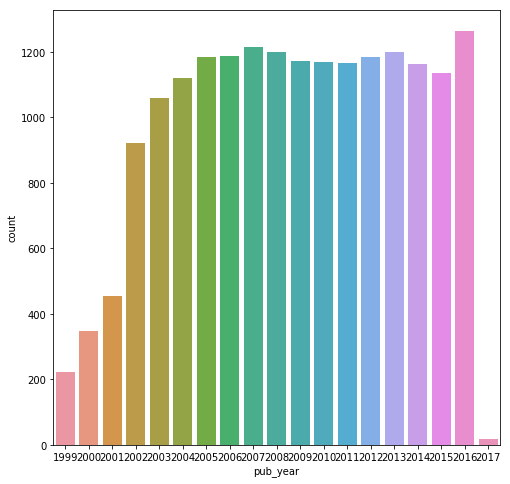

In [8]:
#a = pd.DataFrame(reviews.groupby('pub_year').count()['reviewid'])
#a.rename(columns = {'reviewid':'Number of Reveiws'})
plt.figure(figsize = (8,8))
sns.countplot(x = 'pub_year',data = pd.DataFrame(reviews['pub_year']))

#### Review Author

In [12]:
print('Total number of Authors: ',len(reviews.groupby('author').author))
print('Number of Authors > 100 Reviews: ', sum(reviews.groupby('author').author.count() > 100))
print(reviews.groupby('author').author.count().sort_values(ascending = False)[:10])

Total number of Authors:  432
Number of Authors > 100 Reviews:  51
author
joe tangari           816
stephen m. deusner    725
ian cohen             699
brian howe            500
mark richardson       476
stuart berman         445
marc hogan            439
nate patrin           347
marc masters          312
jayson greene         299
Name: author, dtype: int64


#### Review Score

In [13]:
print('Max: ', reviews.score.max())
print('Min: ', reviews.score.min())
print('Mean: ',reviews.score.mean())
print('Median: ',reviews.score.median())

Max:  10.0
Min:  0.0
Mean:  7.005779372587397
Median:  7.2


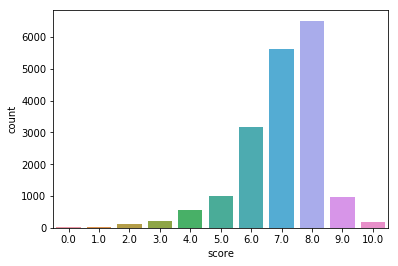

In [14]:
sns.countplot(x = 'score',data = pd.DataFrame(reviews['score'].round(0)))

#### Genre

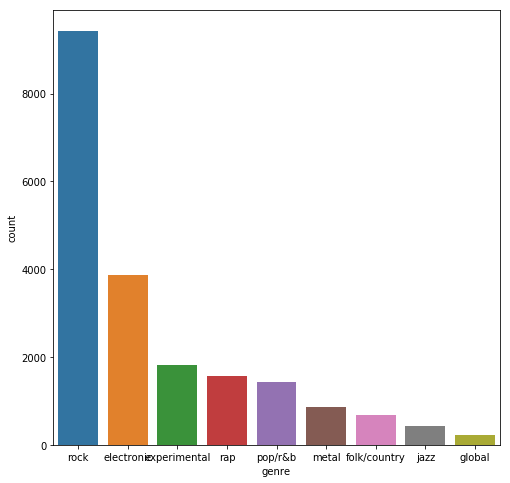

In [15]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'genre', data = genres, order = genres['genre'].value_counts().index)